In [1]:
#pip install mrmr_selection

In [2]:
#pip install polars

In [3]:
#pip install xgboost

In [4]:
#pip install --upgrade scikit-learn

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import random
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from numpy import argmax
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn import metrics
from mrmr import mrmr_classif
np.random.seed(1234)

In [2]:
################################################################################################################################
#upload the data and create a dataframe called df
################################################################################################################################
df=pd.read_csv("winequality-white.csv",sep=';')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
#remove white spaces
df.columns = df.columns.str.replace(' ', '_')

In [5]:
df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [6]:
len(df)

4898

In [7]:
################################################################################################################################
#convert the quality column into a binary column
################################################################################################################################
df['binary_quality']=''
#convert to a binary outcome
for i in range(len(df)):
    if df['quality'].iloc[i]<5:
        df['binary_quality'].iloc[i]=1
    else:
        df['binary_quality'].iloc[i]=0

In [8]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,binary_quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [9]:
df.tail()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,binary_quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,0


In [10]:
#check for the number of positive cases
sum(df['binary_quality'])

183

In [11]:
#compute the percentage of positives
print(round(sum(df['binary_quality'])/len(df['binary_quality'])*100,2),'%')

3.74 %


In [12]:
################################################################################################################################
#manipulate the dataframe to illustrate the application of different preprocessing technical tools
################################################################################################################################
#delete one record of each row one and two
df['fixed_acidity'][0]=np.nan
df['volatile_acidity'][1]=np.nan

In [13]:
#create an "unfeasible" value for residual sugar
df['residual_sugar'][2]=-100

In [14]:
#add an empty virtual feature
df['vf_empty']=np.nan

In [15]:
#add a redundant virtual feature
df['vf_redundant']=df['citric_acid']*2*random.uniform(0, 1)

In [16]:
#add an irrelevant virtual feature
df['vf_irrelevant']=''
for i in range(len(df)):
    df['vf_irrelevant'][i]=random.uniform(0, 1)

In [17]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,binary_quality,vf_empty,vf_redundant,vf_irrelevant
0,NaN,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0,NaN,0.658593,0.344175
1,6.3,NaN,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0,NaN,0.622004,0.743368
2,8.1,0.28,0.40,-100.0,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0,NaN,0.731770,0.270562
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,NaN,0.585416,0.245178
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,NaN,0.585416,0.992513


In [18]:
################################################################################################################################
#preprocess the data
################################################################################################################################
#check for empties
df.isna().sum()

fixed_acidity              1
volatile_acidity           1
citric_acid                0
residual_sugar             0
chlorides                  0
free_sulfur_dioxide        0
total_sulfur_dioxide       0
density                    0
pH                         0
sulphates                  0
alcohol                    0
quality                    0
binary_quality             0
vf_empty                4898
vf_redundant               0
vf_irrelevant              0
dtype: int64

In [19]:
#impute a column with a mean
df['fixed_acidity'].fillna(int(df['fixed_acidity'].mean()), inplace=True)

In [20]:
#eliminate column with too many empties
# based on a threshold
df=df.dropna(axis=1,thresh=4000)

In [21]:
#check for empties
df.isna().sum()

fixed_acidity           0
volatile_acidity        1
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
binary_quality          0
vf_redundant            0
vf_irrelevant           0
dtype: int64

In [22]:
#eliminate the reamining rows with little NaNs if needed
df.dropna(inplace=True)

In [23]:
#check for empties
df.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
binary_quality          0
vf_redundant            0
vf_irrelevant           0
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'fixed_acidity'),
  Text(1, 0, 'volatile_acidity'),
  Text(2, 0, 'citric_acid'),
  Text(3, 0, 'residual_sugar'),
  Text(4, 0, 'chlorides'),
  Text(5, 0, 'free_sulfur_dioxide'),
  Text(6, 0, 'total_sulfur_dioxide'),
  Text(7, 0, 'density'),
  Text(8, 0, 'pH'),
  Text(9, 0, 'sulphates'),
  Text(10, 0, 'alcohol'),
  Text(11, 0, 'quality'),
  Text(12, 0, 'binary_quality'),
  Text(13, 0, 'vf_redundant'),
  Text(14, 0, 'vf_irrelevant')])

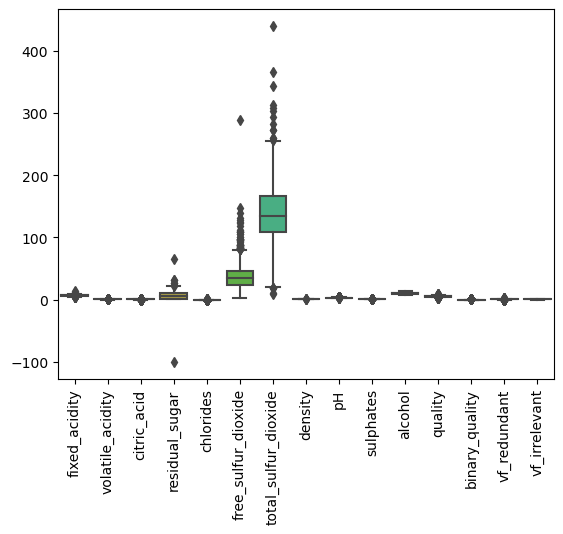

In [24]:
#outlier detection, visualize all the features
sns.boxplot(data=df)
plt.xticks(rotation=90)

<Axes: >

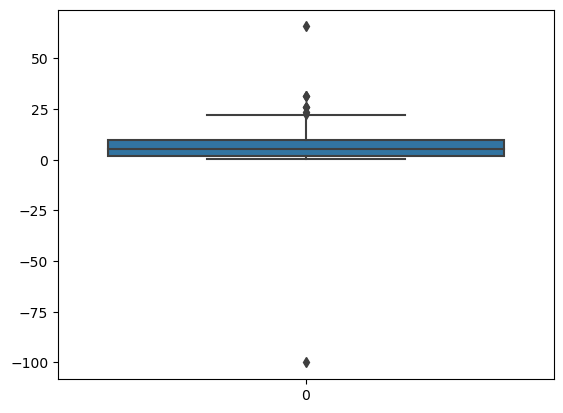

In [25]:
#outlier visualization, one feature
sns.boxplot(data=df['residual_sugar'])

In [26]:
min(df['residual_sugar'])

-100.0

In [27]:
#drop outliers based on a condition. In this case domain knowledge indicates that no negatives values are feasible.
df.drop(df[df.residual_sugar<0].index , inplace=True)

<Axes: >

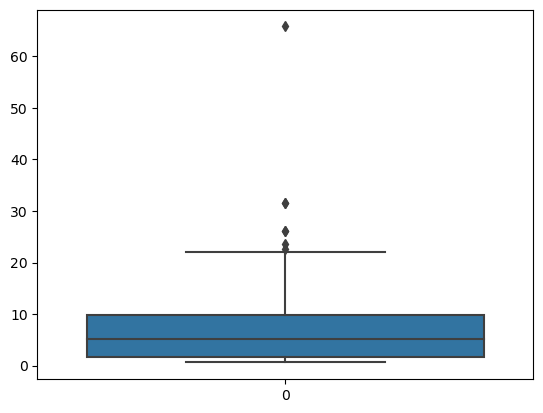

In [28]:
#outlier visualization, one feature
sns.boxplot(data=df['residual_sugar'])

In [29]:
#data driven approach  to remove outliers based on the IQR
#compute the upper and lower limits
Q1 = df['residual_sugar'].quantile(0.25)
Q3 = df['residual_sugar'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
# Create arrays of Boolean values indicating the outlier rows
df.drop(df[df.residual_sugar<=lower].index , inplace=True)
df.drop(df[df.residual_sugar>=upper].index , inplace=True)

<Axes: >

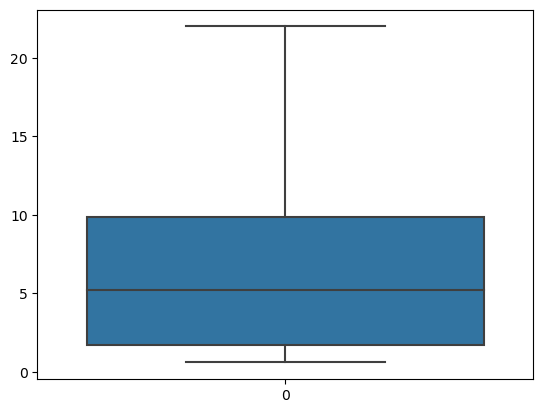

In [30]:
#outlier visualization, one feature
sns.boxplot(data=df['residual_sugar'])

In [31]:
len(df)

4889

In [32]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,binary_quality,vf_redundant,vf_irrelevant
0,6.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0,0.658593,0.344175
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,0.585416,0.245178
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,0.585416,0.992513
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0,0.731770,0.750274
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,0,0.292708,0.327439


In [33]:
################################################################################################################################
#create the learning dataset
################################################################################################################################
#create y, a vector with the labels
y=df.iloc[:,12]
y=y.astype('int')
print(y)

0       0
3       0
4       0
5       0
6       0
       ..
4893    0
4894    0
4895    0
4896    0
4897    0
Name: binary_quality, Length: 4889, dtype: int32


In [34]:
#samples by labels
y.value_counts()

0    4706
1     183
Name: binary_quality, dtype: int64

In [35]:
df = df.drop(['quality','binary_quality'], axis=1)

In [36]:
#create X, a matrix with the features
X=df

In [37]:
#rank the features based on the  the "minimum Redundancy - Maximum Relevance" filter feature selection algorithm
selected_features = mrmr_classif(X=X, y=y, K=13)

100%|██████████| 13/13 [00:06<00:00,  1.92it/s]


In [38]:
#ranked features
selected_features

['volatile_acidity',
 'fixed_acidity',
 'free_sulfur_dioxide',
 'chlorides',
 'residual_sugar',
 'sulphates',
 'alcohol',
 'vf_redundant',
 'citric_acid',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'vf_irrelevant']

In [39]:
#eliminate the last ranked feature
X=X[X.columns.intersection(selected_features[0:12])]

In [40]:
#correlation analysis
X.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,vf_redundant
fixed_acidity,1.000000,-0.024714,0.289355,0.085975,0.023406,-0.049068,0.090619,0.267536,-0.426512,-0.017163,-0.119850,0.289355
volatile_acidity,-0.024714,1.000000,-0.152958,0.046094,0.070001,-0.094810,0.089198,0.003228,-0.033459,-0.037920,0.067298,-0.152958
citric_acid,0.289355,-0.152958,1.000000,0.091397,0.113167,0.094318,0.120789,0.148291,-0.164382,0.061691,-0.076467,1.000000
residual_sugar,0.085975,0.046094,0.091397,1.000000,0.085685,0.309713,0.408149,0.831570,-0.199056,-0.027709,-0.462482,0.091397
chlorides,0.023406,0.070001,0.113167,0.085685,1.000000,0.101018,0.199090,0.261312,-0.090678,0.017186,-0.362290,0.113167
free_sulfur_dioxide,-0.049068,-0.094810,0.094318,0.309713,0.101018,1.000000,0.615974,0.309059,0.000400,0.060069,-0.250512,0.094318
total_sulfur_dioxide,0.090619,0.089198,0.120789,0.408149,0.199090,0.615974,1.000000,0.543690,0.002856,0.134748,-0.448612,0.120789
density,0.267536,0.003228,0.148291,0.831570,0.261312,0.309059,0.543690,1.000000,-0.098492,0.074801,-0.806471,0.148291
pH,-0.426512,-0.033459,-0.164382,-0.199056,-0.090678,0.000400,0.002856,-0.098492,1.000000,0.155226,0.121211,-0.164382
sulphates,-0.017163,-0.037920,0.061691,-0.027709,0.017186,0.060069,0.134748,0.074801,0.155226,1.000000,-0.017963,0.061691


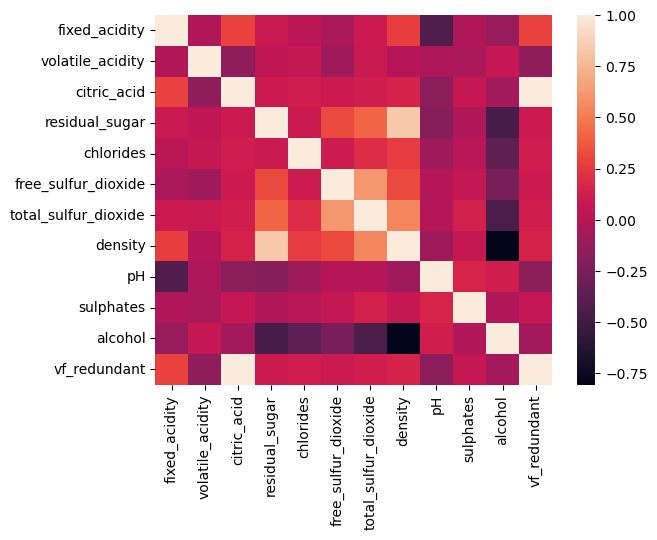

In [41]:
sns.heatmap(X.corr());

In [42]:
#delete the highly correlated feature
X = X.drop('vf_redundant', axis=1)

In [43]:
X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,6.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6


In [44]:
#split the data into training (90%) and validation (10%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [45]:
#samples by labels
y_train.value_counts()

0    4240
1     160
Name: binary_quality, dtype: int64

In [46]:
#samples by labels
y_test.value_counts()

0    466
1     23
Name: binary_quality, dtype: int64

In [47]:
#normalize the data
#fit scaler on the training data
norm=MinMaxScaler().fit(X_train)
#transform the training data
X_train_norm=norm.transform(X_train)
#transform the test data
X_test_norm=norm.transform(X_test)

In [48]:
################################################################################################################################
#Train the algorithm
################################################################################################################################
#Create a regularized logistic regression instance. Sparsity increases as we increase lambda (or decrease C, as C= 1/ λ).
#hyper parameter C is inverse of regularization strength; it must be a positive float (e.g., from 1000 to .001).
#many values of C need to be tested to solve prediction and parsomonious tradeoff

In [49]:
#Heuristically define several values of C
C=[1000,500,100,50,10,5,1,.5,.05,.01,.005,.001]

In [63]:
#train a model for each value of C
logloss=[]
for c in C:
    #define the model
    clf_temp = LogisticRegression(C=c, penalty= 'l1', solver='liblinear')
    #train the model
    clf_temp.fit(X_train_norm, y_train)
    #Predict the response for test dataset
    y_pred_temp = clf_temp.predict(X_test_norm)#predict classification
    y_pred_prob_temp = clf_temp.predict_proba(X_test_norm)#predict probabilities
    y_pred_prob_temp=y_pred_prob_temp[:,1]
    #compute the logloss to select the best model wrt to this loss function
    logloss.append(log_loss(y_test,y_pred_prob_temp))

In [64]:
#list the logloss
logloss

[0.1599581954035476,
 0.15994824134241556,
 0.15989999192687468,
 0.15979808447987592,
 0.1592636438423856,
 0.15888602167579444,
 0.15859693122149965,
 0.16040935218230323,
 0.19014680805189127,
 0.1910905061268494,
 0.19908588011192868,
 0.35434323936677653]

In [67]:
#find the C index with the smallest logloss
ixc=pd.Series(logloss).idxmin()

In [70]:
#select the final value of C
CF=C[ixc]
CF

1

In [73]:
#define the final model
clf = LogisticRegression(C=CF, penalty= 'l1', solver='liblinear')

In [74]:
#Train the model using the training set
clf.fit(X_train_norm, y_train)

LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [75]:
#see the selected (non-zero) coefficients
print('Non Zero weights:',clf.coef_)

Non Zero weights: [[ 0.83752569  5.70270572 -0.52246684 -4.43679135  0.         -4.16607586
  -1.95156847  5.40073053 -0.23416786 -0.91241961 -0.2196287 ]]


In [76]:
#Predict the response for test dataset
y_pred = clf.predict(X_test_norm)#predict classification
y_pred_prob = clf.predict_proba(X_test_norm)#predict probabilities
y_pred_prob=y_pred_prob[:,1]

In [77]:
y_pred_prob[0:10]

array([0.01146644, 0.00703451, 0.01284626, 0.01486664, 0.01420427,
       0.21484576, 0.07406679, 0.01095056, 0.01063128, 0.01442935])

In [78]:
y_test[0:2]

146    0
81     0
Name: binary_quality, dtype: int32

In [79]:
#create the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

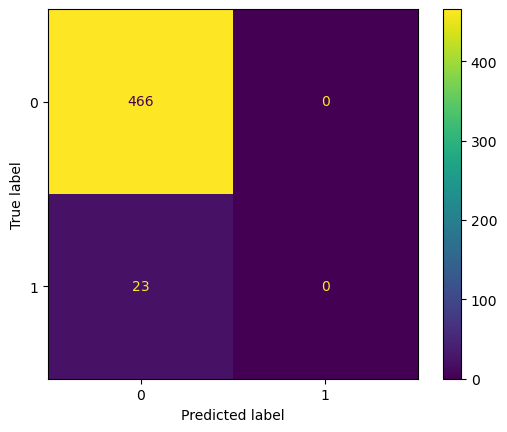

In [80]:
#display the confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [81]:
#assign values to the four elements of the confusion matrix
tn,fp,fn,tp=metrics.confusion_matrix(y_test, y_pred).ravel()

In [82]:
#compute the alpha, beta, and gmeans
alpha=fp/(fp+tn)
beta=fn/(fn+tp)
gmeans=np.sqrt((1-alpha)*(1-beta))

In [83]:
#print metrics
print('Alpha:', round(alpha*100,2), '%')
print('Beta:', round(beta*100,2), '%')
print('Gmeans:', round(gmeans,2))

Alpha: 0.0 %
Beta: 100.0 %
Gmeans: 0.0


In [84]:
#optimize predictions wrt gmeans
#calculate thr roc curves
fpr, tpr, thresholdsgmean = roc_curve(y_test, y_pred_prob)

In [85]:
#calculate the gmeans associated to each threshold
gmeans=np.sqrt(tpr*(1-fpr))
#locate the index of the largest gmean
ixgmean=argmax(gmeans)
print('Best threshold=%f, gmean=%.3f' %(thresholdsgmean[ixgmean], gmeans[ixgmean]))

Best threshold=0.041428, gmean=0.738


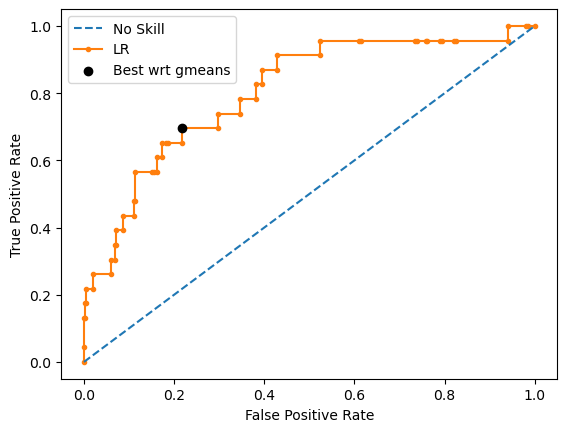

In [86]:
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='LR',zorder=1)
pyplot.scatter(fpr[ixgmean], tpr[ixgmean], marker='o', color='black', label='Best wrt gmeans',zorder=2)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [87]:
#area under the curve
aucmeans=auc(tpr, (1-fpr))
aucmeans

0.8036947191640231

In [88]:
#predict classes using the optimal classification threshold wrt the gmeans
optimalthreshold=thresholdsgmean[ixgmean]
y_pred_gmean=y_pred_prob>=optimalthreshold
y_pred_gmean=y_pred_gmean.astype('int')

In [89]:
#create the confusion matrix
confusion_matrixo = metrics.confusion_matrix(y_test, y_pred_gmean)

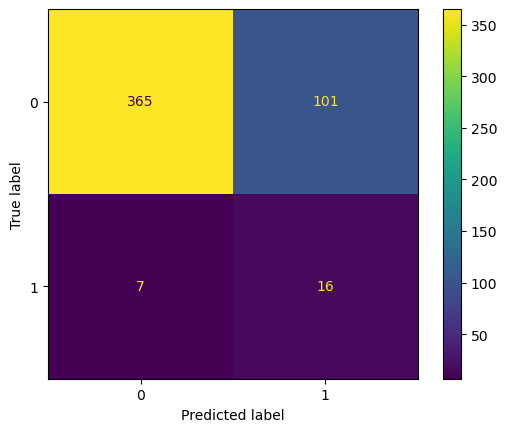

In [90]:
#display the confusion matrix
cm_displayo = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrixo)
cm_displayo.plot()
plt.show()

In [91]:
#assign values to the four elements of the confusion matrix
tno,fpo,fno,tpo=metrics.confusion_matrix(y_test, y_pred_gmean).ravel()

In [92]:
#compute the alpha, beta, and gmeans based on the optimal classificationthreshold 
alphao=fpo/(fpo+tno)
betao=fno/(fno+tpo)
gmeanso=np.sqrt((1-alphao)*(1-betao))

In [93]:
#print metrics
print('Alpha:', round(alphao*100,2), '%')
print('Beta:', round(betao*100,2), '%')
print('Gmeans:', round(gmeanso,2))

Alpha: 21.67 %
Beta: 30.43 %
Gmeans: 0.74
